In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from matplotlib.pyplot import figure
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Statistical Tests
* After extracting perspective features, we perform statistical tests to assess if fake/real news have different patterns of toxicity, insult, etc

In [4]:
# reading inputs

politifact = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/politifact.csv")
gossipcop = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/gossipcop.csv")
kaggle = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/kaggle_kdd_features.csv")
liar = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/liar_features.csv")
coaid = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/coaid_features.csv")
celebrity = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/celebrity.csv")
fakenews = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/fakenews.csv")


In [5]:
#updating kaggle labels
dict_replace = {"1": "fake", "0":"real"}
kaggle["label"] = kaggle["label"].map(dict_replace)
kaggle.head()

,text,label,toxicity,severe_toxicity,insult,profanity,threat,inflammatory,identity_attack
0,Get the latest from TODAY Sign up for our news...,fake,0.075312,0.003121,0.061367,0.017790,0.017353,0.122712,0.020502
1,2d Conan On The Funeral Trump Will Be Invited...,fake,0.168278,0.013198,0.117168,0.039627,0.063047,0.436911,0.039937
2,It’s safe to say that Instagram Stories has fa...,real,0.053335,0.001791,0.043110,0.009907,0.011532,0.133064,0.016025
3,Much like a certain Amazon goddess with a lass...,real,0.169659,0.007045,0.199721,0.087059,0.015284,0.138521,0.058701
4,At a time when the perfect outfit is just one ...,real,0.089041,0.003106,0.057315,0.017860,0.013768,0.031718,0.021292


In [6]:
#updating liar labels
dict_replace = {0: "fake",1:"fake",2:"fake", 4:"fake", 5:"fake", 3:"real"}
liar["label"] = liar["label"].map(dict_replace)
liar.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,...,context,split,text,toxicity,severe_toxicity,insult,profanity,threat,inflammatory,identity_attack
0,2635.json,fake,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,a mailer,train,Says the Annies List political group supports ...,0.194373,0.009988,0.182632,0.039348,0.030105,0.715924,0.078110
1,10540.json,fake,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,a floor speech.,train,When did the decline of coal start? It started...,0.032044,0.001776,0.017449,0.007081,0.011920,0.268393,0.014260
2,324.json,fake,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,Denver,train,"Hillary Clinton agrees with John McCain ""by vo...",0.077309,0.002571,0.047802,0.011372,0.015838,0.184013,0.035407
3,1123.json,fake,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,a news release,train,Health care reform legislation is likely to ma...,0.271282,0.009690,0.082755,0.135339,0.019238,0.349423,0.125051
4,9028.json,fake,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,an interview on CNN,train,The economic turnaround started at the end of ...,0.019020,0.001769,0.012537,0.011511,0.015579,0.108497,0.017447


In [7]:
#updating coaid labels
dict_replace = {"Fake": "fake", "Real":"real"}
coaid["label"] = coaid["label"].map(dict_replace)
coaid.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,...,meta_keywords,text,label,toxicity,severe_toxicity,insult,profanity,threat,inflammatory,identity_attack
0,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,...,"""""",speaker robin vos r rochester and senate major...,fake,0.015480,0.001182,0.013197,0.004988,0.011772,0.067169,0.014129
1,16,article,https://www.politifact.com/factchecks/2020/apr...,NaN,https://secondnexus.com/wisconsin-gop-new-case...,NaN,NaN,NaN,NaN,Says WisconsinÕs in-person election has caused...,...,"""""",this is not the page you 're looking for ..,fake,0.037023,0.002631,0.015470,0.007814,0.012216,0.096060,0.015551
2,17,article,https://healthfeedback.org/claimreview/claim-b...,https://archive.is/DHIrM,https://www.gilmorehealth.com/chinese-coronavi...,NaN,NaN,NaN,NaN,Nobel laureate Luc Montagnier claimed that the...,...,"""""",contrary to the narrative that is being pushed...,fake,0.027581,0.001598,0.022435,0.005965,0.012549,0.248995,0.019238
3,26,article,https://healthfeedback.org/viral-video-promote...,https://web.archive.org/web/20200414143612/htt...,https://www.theepochtimes.com/programming-aler...,NaN,NaN,NaN,NaN,A video argues that the pandemic could have re...,...,"""CCP virus,documentary,joshua phillip,THE EPOC...",programming alert exclusive documentary on ori...,fake,0.035993,0.001947,0.029913,0.009070,0.022713,0.037958,0.035618
4,32,article,https://www.politifact.com/factchecks/2020/apr...,NaN,https://www.wivb.com/news/watch-interview-with...,NaN,NaN,NaN,NaN,Gov. Andrew Cuomo Òwas simply saying if we can...,...,"""Hochul""",buffalo n.y. wivb)--mayor byron brown was hand...,fake,0.023804,0.001397,0.024194,0.011930,0.014803,0.257117,0.017815


In [8]:
features = ['toxicity', 'severe_toxicity', 'insult', 'profanity', 'threat', 'inflammatory', 'identity_attack']

In [9]:
def stat_test(df,feature_list,boxplot=True,outliers=False):
  dict_of_means = {}
  df = df[df.toxicity >= 0]
  df_fake = df[df["label"]=="fake"]
  df_real = df[df["label"]=="real"]

  for f in feature_list:
    fake = df_fake[f].values
    real = df_real[f].values
    pvalue = mannwhitneyu(fake,real)[1]
    print("Feature:",f, "\nP-value:",pvalue)
    print("Avg Fake:",np.round(df_fake[f].mean(),5),"Avg Real:", np.round(df_real[f].mean(),5),"\n")
    dict_of_means[f] = {"fake":np.round(df_fake[f].mean(),5),"real":np.round(df_real[f].mean(),5)}
    if(boxplot):  
      g = sns.boxplot(data=[fake,real],showfliers=outliers).set_xticklabels(['Fake','Real'])
      plt.title(f)
      plt.show()
  return dict_of_means


## Politifact

Feature: toxicity 
P-value: 2.1477405027693697e-22
Avg Fake: 0.16357 Avg Real: 0.08424 



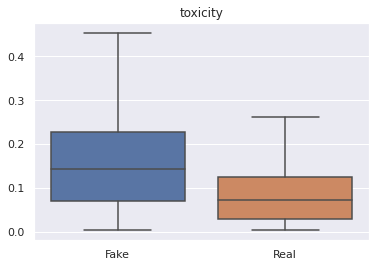

Feature: severe_toxicity 
P-value: 1.402198008251863e-20
Avg Fake: 0.01591 Avg Real: 0.00458 



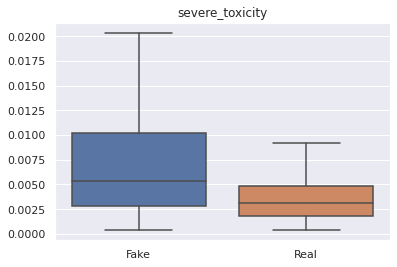

Feature: insult 
P-value: 4.856984232585938e-23
Avg Fake: 0.18027 Avg Real: 0.08553 



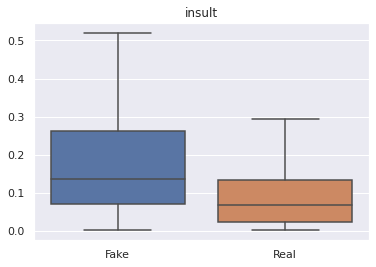

Feature: profanity 
P-value: 5.122827489829176e-19
Avg Fake: 0.05318 Avg Real: 0.02226 



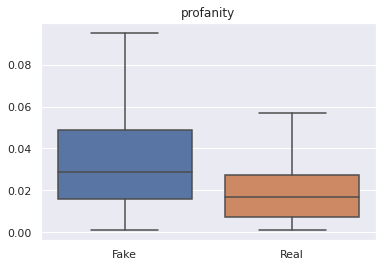

Feature: threat 
P-value: 9.307683488930086e-20
Avg Fake: 0.06001 Avg Real: 0.02211 



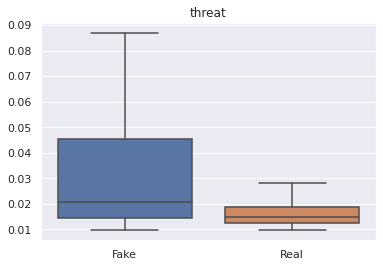

Feature: inflammatory 
P-value: 3.143448922134961e-24
Avg Fake: 0.31794 Avg Real: 0.14184 



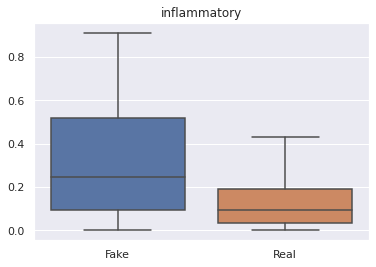

Feature: identity_attack 
P-value: 1.3327965681905588e-14
Avg Fake: 0.08199 Avg Real: 0.03792 



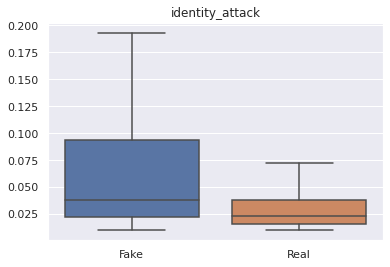

,fake,real
toxicity,0.16357,0.08424
severe_toxicity,0.01591,0.00458
insult,0.18027,0.08553
profanity,0.05318,0.02226
threat,0.06001,0.02211
inflammatory,0.31794,0.14184
identity_attack,0.08199,0.03792


In [10]:
aux_dict = stat_test(politifact,features,boxplot=True)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## GossipCop

Feature: toxicity 
P-value: 7.92012143291133e-50
Avg Fake: 0.12101 Avg Real: 0.10679 



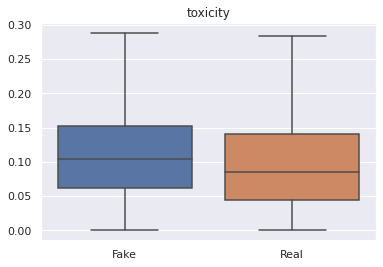

Feature: severe_toxicity 
P-value: 1.862595713272223e-11
Avg Fake: 0.00813 Avg Real: 0.00827 



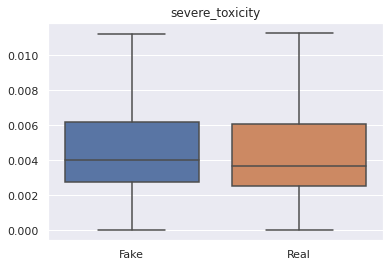

Feature: insult 
P-value: 1.7749736753588123e-62
Avg Fake: 0.13444 Avg Real: 0.11313 



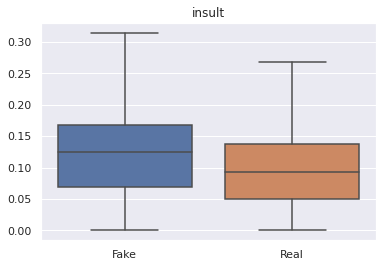

Feature: profanity 
P-value: 3.902644142251571e-10
Avg Fake: 0.04594 Avg Real: 0.04561 



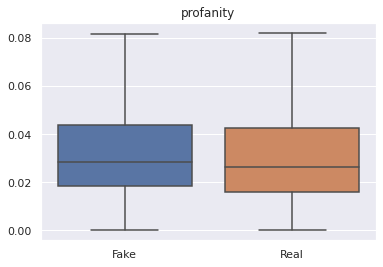

Feature: threat 
P-value: 1.5939040021927705e-11
Avg Fake: 0.02506 Avg Real: 0.02576 



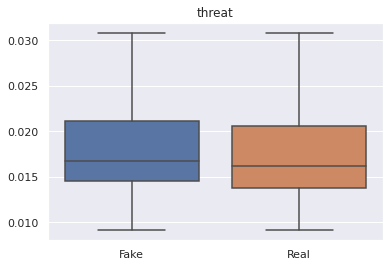

Feature: inflammatory 
P-value: 2.4447671642486684e-83
Avg Fake: 0.25519 Avg Real: 0.2039 



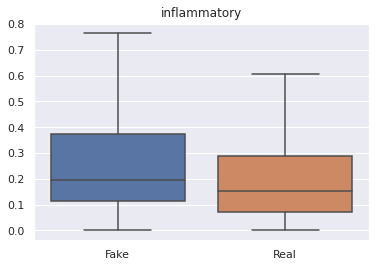

Feature: identity_attack 
P-value: 1.0786357223906648e-25
Avg Fake: 0.03904 Avg Real: 0.03751 



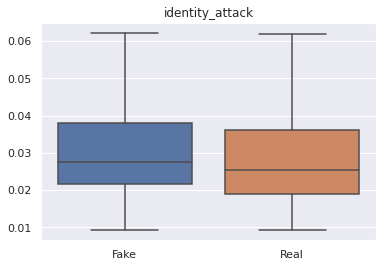

,fake,real
toxicity,0.12101,0.10679
severe_toxicity,0.00813,0.00827
insult,0.13444,0.11313
profanity,0.04594,0.04561
threat,0.02506,0.02576
inflammatory,0.25519,0.20390
identity_attack,0.03904,0.03751


In [11]:
aux_dict = stat_test(gossipcop,features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## Kaggle

Feature: toxicity 
P-value: 3.0415917964393343e-26
Avg Fake: 0.14492 Avg Real: 0.12125 



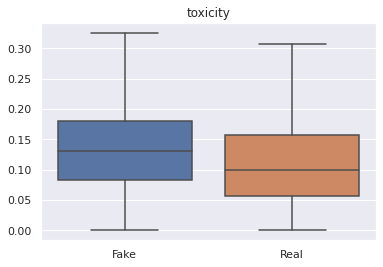

Feature: severe_toxicity 
P-value: 5.89028206759402e-12
Avg Fake: 0.01056 Avg Real: 0.00921 



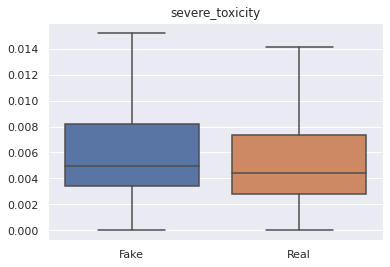

Feature: insult 
P-value: 1.9914377944234302e-23
Avg Fake: 0.12098 Avg Real: 0.09778 



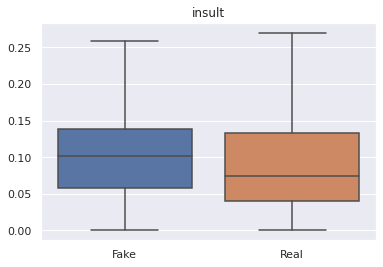

Feature: profanity 
P-value: 0.0006115114281597512
Avg Fake: 0.0471 Avg Real: 0.04571 



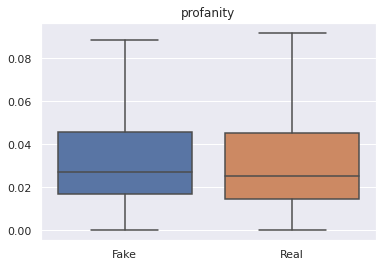

Feature: threat 
P-value: 0.15444495506141442
Avg Fake: 0.02691 Avg Real: 0.02668 



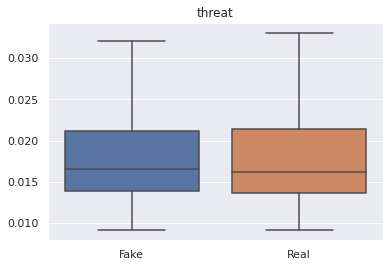

Feature: inflammatory 
P-value: 9.040033745519399e-33
Avg Fake: 0.26023 Avg Real: 0.20132 



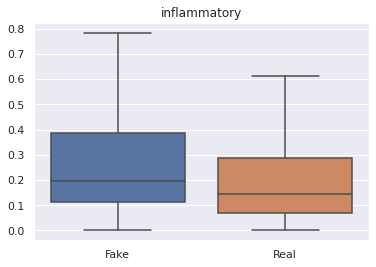

Feature: identity_attack 
P-value: 2.009006304560947e-10
Avg Fake: 0.04429 Avg Real: 0.03884 



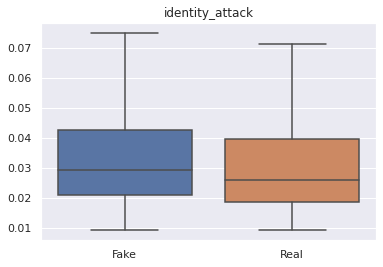

,fake,real
toxicity,0.14492,0.12125
severe_toxicity,0.01056,0.00921
insult,0.12098,0.09778
profanity,0.04710,0.04571
threat,0.02691,0.02668
inflammatory,0.26023,0.20132
identity_attack,0.04429,0.03884


In [12]:
aux_dict = stat_test(kaggle,features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## Liar

Feature: toxicity 
P-value: 4.817051665446125e-11
Avg Fake: 0.07159 Avg Real: 0.05802 



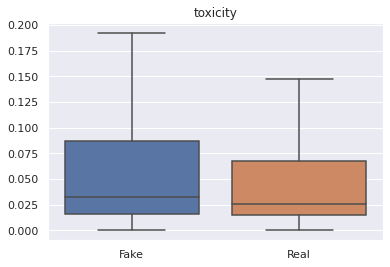

Feature: severe_toxicity 
P-value: 2.712484608939178e-06
Avg Fake: 0.00445 Avg Real: 0.00327 



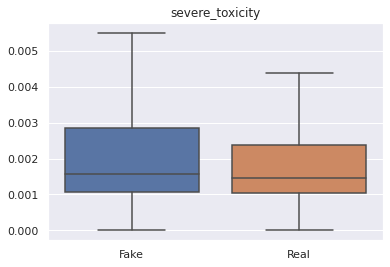

Feature: insult 
P-value: 1.2459176594500099e-12
Avg Fake: 0.05623 Avg Real: 0.04523 



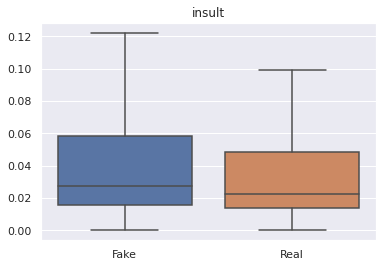

Feature: profanity 
P-value: 0.0003473441393209838
Avg Fake: 0.01715 Avg Real: 0.01373 



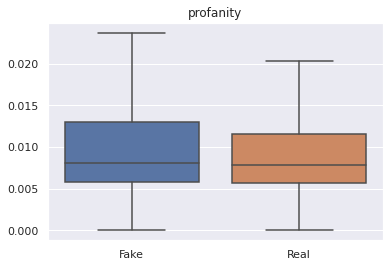

Feature: threat 
P-value: 0.0010440998974143177
Avg Fake: 0.02769 Avg Real: 0.02495 



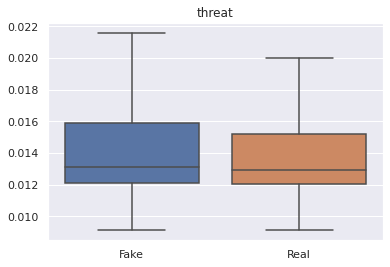

Feature: inflammatory 
P-value: 0.0004274886148666732
Avg Fake: 0.29252 Avg Real: 0.27592 



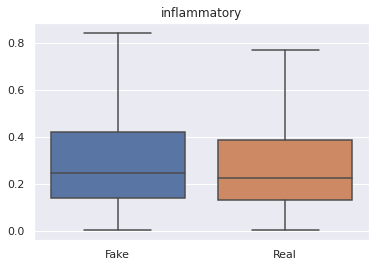

Feature: identity_attack 
P-value: 0.0015354691977570386
Avg Fake: 0.04491 Avg Real: 0.03827 



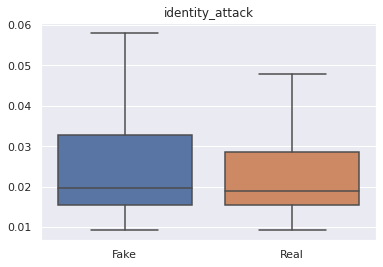

,fake,real
toxicity,0.07159,0.05802
severe_toxicity,0.00445,0.00327
insult,0.05623,0.04523
profanity,0.01715,0.01373
threat,0.02769,0.02495
inflammatory,0.29252,0.27592
identity_attack,0.04491,0.03827


In [13]:
aux_dict = stat_test(liar, features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## Coaid

Feature: toxicity 
P-value: 1.1828093719261239e-35
Avg Fake: 0.08528 Avg Real: 0.02544 



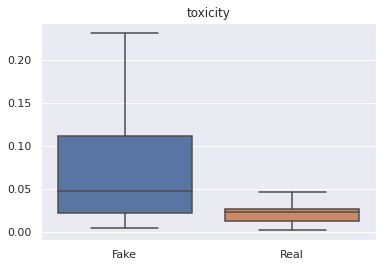

Feature: severe_toxicity 
P-value: 8.317880871132223e-35
Avg Fake: 0.00452 Avg Real: 0.00161 



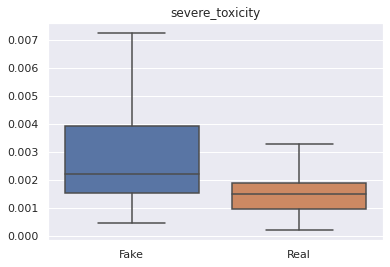

Feature: insult 
P-value: 4.228953560292585e-23
Avg Fake: 0.06685 Avg Real: 0.01985 



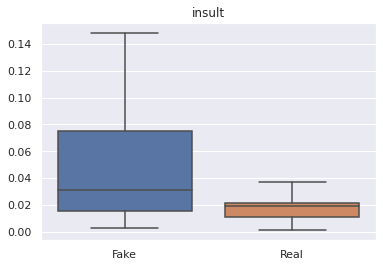

Feature: profanity 
P-value: 0.00026685816226996913
Avg Fake: 0.02588 Avg Real: 0.01046 



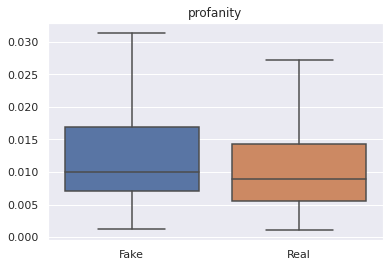

Feature: threat 
P-value: 0.046655918192166426
Avg Fake: 0.02302 Avg Real: 0.0159 



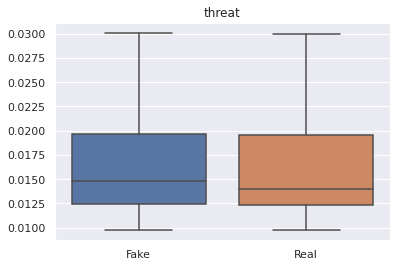

Feature: inflammatory 
P-value: 1.9968437730812044e-18
Avg Fake: 0.23519 Avg Real: 0.11942 



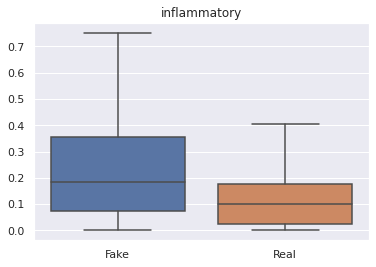

Feature: identity_attack 
P-value: 5.80435003261019e-14
Avg Fake: 0.03765 Avg Real: 0.01986 



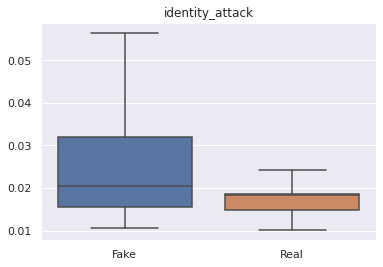

,fake,real
toxicity,0.08528,0.02544
severe_toxicity,0.00452,0.00161
insult,0.06685,0.01985
profanity,0.02588,0.01046
threat,0.02302,0.01590
inflammatory,0.23519,0.11942
identity_attack,0.03765,0.01986


In [14]:
aux_dict = stat_test(coaid, features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## Celebrity

Feature: toxicity 
P-value: 7.101689598505346e-07
Avg Fake: 0.1615 Avg Real: 0.11861 



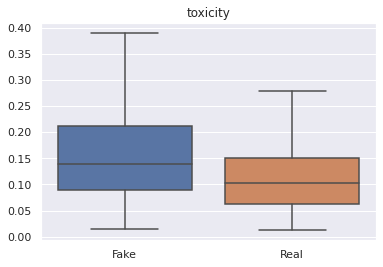

Feature: severe_toxicity 
P-value: 0.0032005415671151317
Avg Fake: 0.01351 Avg Real: 0.00861 



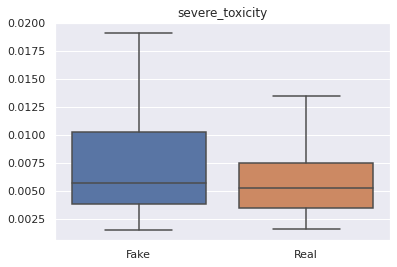

Feature: insult 
P-value: 1.3196757119578584e-09
Avg Fake: 0.17499 Avg Real: 0.11566 



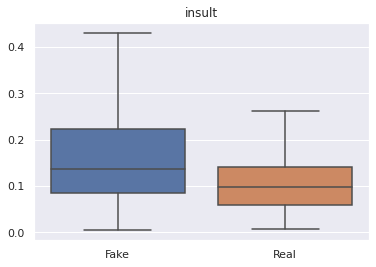

Feature: profanity 
P-value: 0.00014174405992513543
Avg Fake: 0.06126 Avg Real: 0.04127 



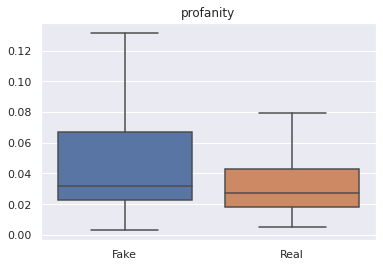

Feature: threat 
P-value: 2.367643029677154e-05
Avg Fake: 0.03024 Avg Real: 0.02246 



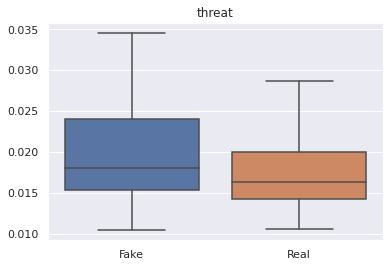

Feature: inflammatory 
P-value: 1.63258634190745e-14
Avg Fake: 0.34951 Avg Real: 0.22473 



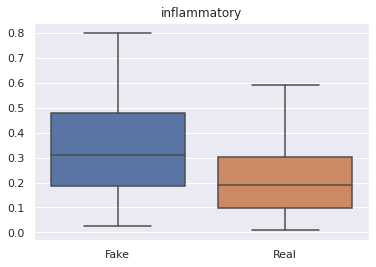

Feature: identity_attack 
P-value: 3.690145744817933e-05
Avg Fake: 0.04892 Avg Real: 0.03588 



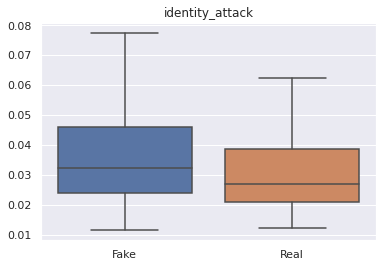

,fake,real
toxicity,0.16150,0.11861
severe_toxicity,0.01351,0.00861
insult,0.17499,0.11566
profanity,0.06126,0.04127
threat,0.03024,0.02246
inflammatory,0.34951,0.22473
identity_attack,0.04892,0.03588


In [15]:
aux_dict = stat_test(celebrity, features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

Feature: toxicity 
P-value: 0.00029187699812417456
Avg Fake: 0.11566 Avg Real: 0.09312 



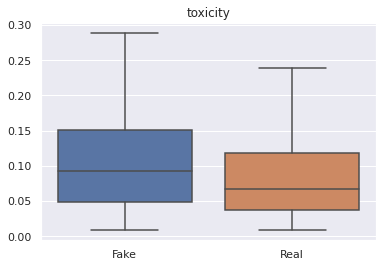

Feature: severe_toxicity 
P-value: 0.013898603354166863
Avg Fake: 0.00793 Avg Real: 0.00543 



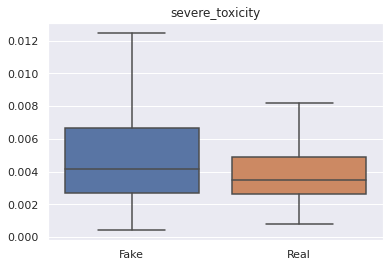

Feature: insult 
P-value: 2.9808182838170024e-09
Avg Fake: 0.10633 Avg Real: 0.07076 



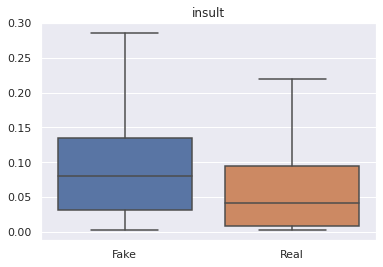

Feature: profanity 
P-value: 1.8675725743387163e-10
Avg Fake: 0.03498 Avg Real: 0.02059 



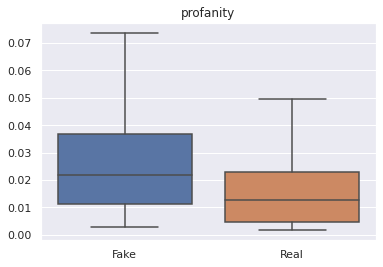

Feature: threat 
P-value: 2.196171559901027e-08
Avg Fake: 0.02905 Avg Real: 0.01744 



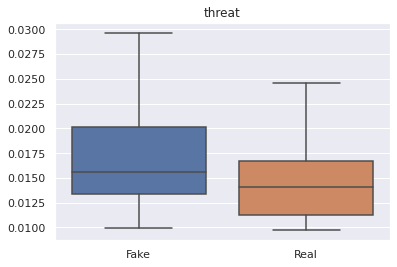

Feature: inflammatory 
P-value: 3.879875269429086e-05
Avg Fake: 0.21554 Avg Real: 0.13876 



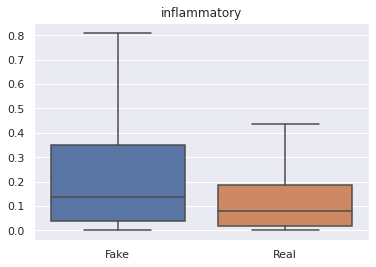

Feature: identity_attack 
P-value: 3.1930475075237924e-09
Avg Fake: 0.05232 Avg Real: 0.03713 



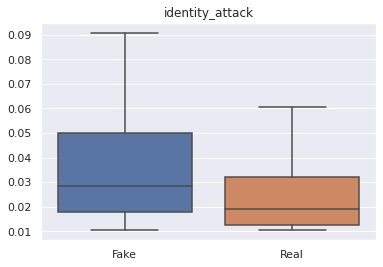

,fake,real
toxicity,0.11566,0.09312
severe_toxicity,0.00793,0.00543
insult,0.10633,0.07076
profanity,0.03498,0.02059
threat,0.02905,0.01744
inflammatory,0.21554,0.13876
identity_attack,0.05232,0.03713


In [16]:
aux_dict = stat_test(fakenews, features)
means_results_df = pd.DataFrame.from_dict(aux_dict,orient="index")
means_results_df

## CDF of important features
- Insult, Toxicity, and Inflammatory

4197


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

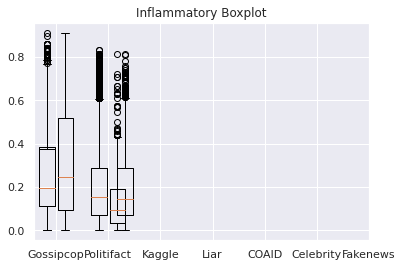

In [96]:
def return_fake_real(df,attribute):
  return [list(df[df["label"]=="fake"][attribute].values), list(df[df["label"]=="real"][attribute].values)]


def return_attribute_dict(attribute, title, gossipcop=gossipcop, kaggle=kaggle, liar=liar, coaid=coaid, fakenews=fakenews,celebrity=celebrity, politifact=politifact):
    gossipcop = gossipcop[gossipcop[attribute]>=0]
    kaggle = kaggle[kaggle[attribute]>=0]
    liar = liar[liar[attribute]>=0]
    coaid = coaid[coaid[attribute]>=0]
    print(len(coaid))
    celebrity = celebrity[celebrity[attribute]>=0]
    fakenews = fakenews[fakenews[attribute]>=0]
    politifact = politifact[politifact[attribute]>=0]

    gossipcop = return_fake_real(gossipcop,attribute)
    politifact = return_fake_real(politifact,attribute)
    kaggle = return_fake_real(kaggle,attribute)
    liar = return_fake_real(liar,attribute)
    coaid = return_fake_real(coaid,attribute)
    celebrity = return_fake_real(celebrity,attribute)
    fakenews = return_fake_real(fakenews,attribute)
    

    ticks = ['Gossipcop', 'Politifact', "Kaggle", "Liar","COAID", "Celebrity", "Fakenews"]
    
    gossipcop_plot = plt.boxplot(gossipcop,
                                  positions=np.array(
        np.arange(len(gossipcop)))*2.0-0.35,
                                  widths=0.6)
    politifact_plot = plt.boxplot(politifact,
                                  positions=np.array(
        np.arange(len(politifact)))*2.0+0.35,
                                  widths=0.6)
    kaggle_plot = plt.boxplot(kaggle,
                                  positions=np.array(
        np.arange(len(kaggle)))*3.0 - 0.35,
                                  widths=0.6)
    # liar_plot = plt.boxplot(liar,
    #                               positions=np.array(
    #     np.arange(len(liar)))*2.0+0.35,
    #                               widths=0.6)
    # coaid_plot = plt.boxplot(coaid,
    #                               positions=np.array(
    #     np.arange(len(coaid)))*2.0+0.35,
    #                               widths=0.6)
    # celebrity_plot = plt.boxplot(celebrity,
    #                               positions=np.array(
    #     np.arange(len(celebrity)))*2.0+0.35,
    #                               widths=0.6)
    # fakenews_plot = plt.boxplot(fakenews,
    #                               positions=np.array(
    #     np.arange(len(fakenews)))*2.0+0.35,
    #                               widths=0.6)
    
    # # set the x label values
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
    
    # # set the limit for x axis
    # plt.xlim(-2, len(ticks)*2)
    
    plt.title(title)

# return_attribute_dict("toxicity", "Toxicity CDF")
# return_attribute_dict("insult", "Insult CDF")
return_attribute_dict("inflammatory", "Inflammatory Boxplot")

## Failure Analysis

Some entries have -1 as their score, indicating a possible failure (empty text, text too long, etc)

In [ ]:
len(politifact[politifact["toxicity"] == -1])

In [ ]:
len(gossipcop[gossipcop["toxicity"] == -1])

In [ ]:
len(liar[liar["toxicity"] == -1])

In [ ]:
len(kaggle[kaggle["toxicity"] == -1])

In [ ]:
len(coaid[coaid["toxicity"] == -1])

In [ ]:
len(celebrity[celebrity["toxicity"] == -1])

In [ ]:
len(fakenews[fakenews["toxicity"] == -1])

In [ ]:
liar["label"].unique()